In [1]:
## Using LSTM to detect churn in the twitter dataset
## ALso using word-embedding

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from keras.preprocessing.text import one_hot
from sklearn.metrics import f1_score

/home/silverstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from nltk.corpus import stopwords
stopwords=stopwords.words("english")

In [6]:
from nltk.stem import PorterStemmer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
from keras.preprocessing import sequence

In [12]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers import concatenate,Flatten,Reshape

In [13]:
from keras.layers import GRU

In [14]:
from keras.models import Model

In [15]:
from keras.layers import RNN
from keras.layers import Input

In [16]:
import keras.backend as K

In [17]:
mainDF=pd.read_csv("dataV2.csv")

In [18]:
brands=np.unique(mainDF['brand'])

# Doing Pre-Processing

In [19]:
mainDF.iloc()[0].text

'gone mangy cat got go  <bb>  drop cable box remote gamestop exchange game rack screws'

In [20]:
porter=PorterStemmer()
def preprocessing(a_tweet):
    cleanTweet=[]
    a_tweet=a_tweet.split(" ")
    for word in a_tweet:
        word=word.strip()
        valid=re.search(pattern=r"[^A-Za-z<>]",string=word)==None
        if(word!="" and valid==True and word not in stopwords):
            word=porter.stem(word)
            cleanTweet.append(word)
    return " ".join(cleanTweet)

In [21]:
mainDF['text']=mainDF['text'].apply(preprocessing)

mainDF=mainDF.dropna()

In [22]:
mainDF.iloc()[0].text

'gone mangi cat got go <bb> drop cabl box remot gamestop exchang game rack screw'

In [23]:
y=mainDF['choose_one']
y=LabelEncoder().fit_transform(y)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(mainDF['text'],y,stratify=y.ravel())

In [25]:
vocab_size = 500

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

In [26]:
max_length = 25
X_train = sequence.pad_sequences(X_train, maxlen=max_length, padding='pre')
X_test = sequence.pad_sequences(X_test, maxlen=max_length, padding='pre')

In [39]:
smote=SMOTE()
X_train,y_train=smote.fit_sample(X_train,y_train)

In [40]:
def createSummary(y_test,y_pred):
    class0List=np.where(y_test==0)
    class1List=np.where(y_test==1)
    sumDict={}
    sumDict['accuracy']=np.mean(y_test==y_pred)
    sumDict['class0Accuracy']=np.mean(y_test[class0List]==y_pred[class0List])
    sumDict['class1Accuracy']=np.mean(y_test[class1List]==y_pred[class1List])
    sumDict['precision']=precision_score(y_test,y_pred)
    sumDict['recall']=recall_score(y_test,y_pred)
    sumDict['f1-score']=f1_score(y_test,y_pred)
    sumDict['auc']=roc_auc_score(y_test,y_pred)
    sumDict['confuseMatrix']=confusion_matrix(y_test,y_pred)
    print(classification_report(y_test,y_pred,target_names=['class 0','class 1']))
#     print(sumDict)
    return sumDict

In [60]:
vocab=500

embedding_vecor_length = 8
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(GRU(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 25, 8)             4000      
_________________________________________________________________
gru_5 (GRU)                  (None, 1)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4,032
Trainable params: 4,032
Non-trainable params: 0
_________________________________________________________________
None
Train on 4638 samples, validate on 980 samples
Epoch 1/10
4638/4638 [==============================] - 1s 287us/step - loss: 0.6895 - acc: 0.6065 - val_loss: 0.6859 - val_acc: 0.6173
Epoch 2/10
4638/4638 [==============================] - 0s 83us/step - loss: 0.6791 - acc: 0.7029 - val_loss: 0.6773 - val_acc: 0.6316
Epoch 3/10
4638/4638 [==============================] - 0s 83us/step - loss: 0.66

In [49]:
# top_words=len(vocab)
embedding_vecor_length = 8
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(GRU(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 25, 8)             4000      
_________________________________________________________________
gru_4 (GRU)                  (None, 1)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 4,032
Trainable params: 4,032
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
# top_words=len(vocab)
embedding_vecor_length = 8
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(LSTM(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 25, 8)             4000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 4,042
Trainable params: 4,042
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,batch_size=128)

Train on 4638 samples, validate on 980 samples
Epoch 1/10
4638/4638 [==============================] - 1s 298us/step - loss: 0.6907 - acc: 0.5962 - val_loss: 0.6859 - val_acc: 0.6959
Epoch 2/10
4638/4638 [==============================] - 0s 87us/step - loss: 0.6837 - acc: 0.7100 - val_loss: 0.6788 - val_acc: 0.6837
Epoch 3/10
4638/4638 [==============================] - 0s 99us/step - loss: 0.6734 - acc: 0.7346 - val_loss: 0.6666 - val_acc: 0.6816
Epoch 4/10
4638/4638 [==============================] - 0s 87us/step - loss: 0.6586 - acc: 0.7426 - val_loss: 0.6474 - val_acc: 0.7020
Epoch 5/10
4638/4638 [==============================] - 0s 89us/step - loss: 0.6400 - acc: 0.7499 - val_loss: 0.6292 - val_acc: 0.7051
Epoch 6/10
4638/4638 [==============================] - 0s 97us/step - loss: 0.6192 - acc: 0.7544 - val_loss: 0.6160 - val_acc: 0.6980
Epoch 7/10
4638/4638 [==============================] - 0s 96us/step - loss: 0.5984 - acc: 0.7646 - val_loss: 0.6032 - val_acc: 0.6969
Epoch 8

In [62]:
y_prob=model.predict_proba(X_test)

In [63]:
np.mean(y_test==np.where(y_prob>0.5,1,0))

0.6155102040816327

/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/silverstar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       207
     class 1       0.79      1.00      0.88       773

   micro avg       0.79      0.79      0.79       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.62      0.79      0.70       980

0.5
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       207
     class 1       0.79      1.00      0.88       773

   micro avg       0.79      0.79      0.79       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.62      0.79      0.70       980

0.5
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       207
     class 1       0.79      1.00      0.88       773

   micro avg       0.79      0.79      0.79       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.62      0.79      0.70       980

0.5
       

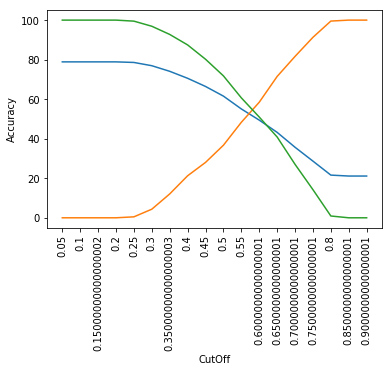

In [64]:
accList=[]
class0List=[]
class1List=[]
for i in np.arange(0.05,0.95,0.05):
    y_pred_1=np.where(y_prob>i,1,0)
    sumDict=createSummary(y_test,y_pred_1)
    accList.append(sumDict['accuracy']*100)
    class0List.append(sumDict['class0Accuracy']*100)
    class1List.append(sumDict['class1Accuracy']*100)
    print(sumDict['auc'])
plt.plot(accList)
plt.plot(class0List)
plt.plot(class1List)
plt.xlabel("CutOff")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0,18,1),np.arange(0.05,0.95,0.05),rotation="vertical")
plt.savefig("plots/TFIDFLightGBMCutoff_ngrams_3.png")
plt.show()

In [65]:
y_pred=model.predict_classes(X_test)

In [59]:
y_pred_2=np.where(y_prob>0.5,1,0)

In [66]:
createSummary(y_test,y_pred)

              precision    recall  f1-score   support

     class 0       0.26      0.37      0.30       207
     class 1       0.81      0.72      0.76       773

   micro avg       0.64      0.64      0.64       980
   macro avg       0.53      0.54      0.53       980
weighted avg       0.69      0.64      0.66       980



{'accuracy': 0.6155102040816327,
 'class0Accuracy': 0.3671497584541063,
 'class1Accuracy': 0.7179818887451488,
 'precision': 0.8090379008746356,
 'recall': 0.7179818887451488,
 'f1-score': 0.7607950651130911,
 'auc': 0.5425658235996275,
 'confuseMatrix': array([[ 76, 131],
        [218, 555]])}

In [95]:
print(classification_report(y_test,y_pred,target_names=['class 0','class 1']))
print(confusion_matrix(y_test,y_pred))
print("Accuracy="+str(np.mean(y_test==y_pred)))

              precision    recall  f1-score   support

     class 0       0.47      0.59      0.52       207
     class 1       0.88      0.82      0.85       773

   micro avg       0.77      0.77      0.77       980
   macro avg       0.68      0.71      0.69       980
weighted avg       0.80      0.77      0.78       980

[[122  85]
 [137 636]]
Accuracy=0.6361370262390671
